In [1]:
import Pkg; 

if split(pwd(),"/")[end] == "_paper_2"
    cd(joinpath(@__DIR__, "../../"))
    Pkg.activate("Project.toml")
end

using CairoMakie
using JLD2

  Activating project at `~/Doktor/Code/MorphoMol/MorphoMolNotebooks`


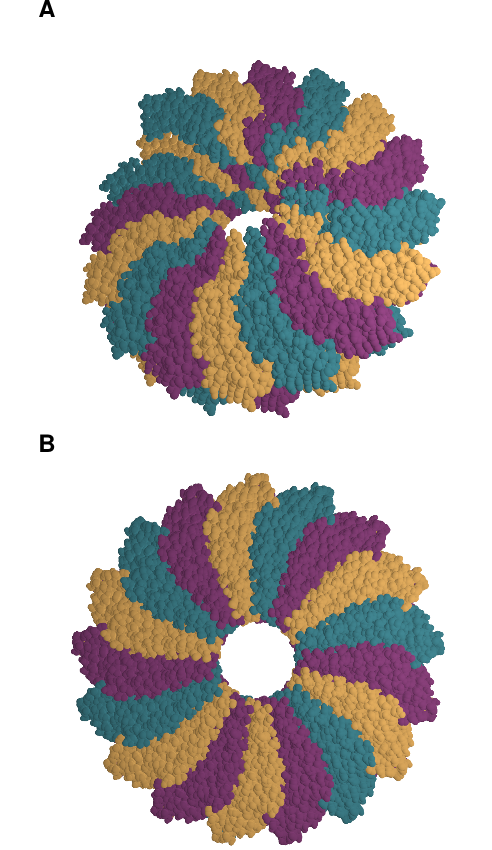

In [4]:
pt_per_in = 72
width = 3.42
height = 5.9
f_size = (pt_per_in * width, pt_per_in * height)
border_width = 0.5
pad = 2

f = Figure(size = f_size, fontsize = 12)
png_dimension = f_size[1] * 0.8

ga = f[1, 1] = GridLayout()
img = load("notebooks/_paper_2/pngs/0/tmv_helix.png")
ax, _ = image(ga[1, 1], rotr90(img),
    axis = (
        width = png_dimension, 
        height = png_dimension, 
        title = "",
        spinewidth=border_width
        )
    )

hidespines!(ax)
hidedecorations!(ax)

gb = f[2, 1] = GridLayout()
img = load("notebooks/_paper_2/pngs/0/tmv_ring.png")
ax, _ = image(gb[1, 1], rotr90(img),
    axis = (
        width = png_dimension, 
        height = png_dimension, 
        title = "",
        spinewidth=border_width
        )
    )

hidespines!(ax)
hidedecorations!(ax)

for (label, layout) in zip(["A", "B"], [ga, gb])
    Label(layout[1, 1, TopLeft()], label,
        fontsize = 12,
        font = :bold,
        padding = (0, pad, pad, 0),
        halign = :right)
end
rowgap!(f.layout, 10)

rs = 0.545
colsize!(f.layout, 1, Relative(1.0))
#colsize!(f.layout, 2, Relative(rs))
rowsize!(f.layout, 1, Relative(rs))
rowsize!(f.layout, 2, Relative(rs))

save(string("notebooks/_paper_2/output/tmv_introduction.pdf"), f, pt_per_unit = 1)
f